In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

## 1. MNIST DATASET

Training set: (60000, 28, 28, 1), Labels: (60000, 10)
Testing set: (10000, 28, 28, 1), Labels: (10000, 10)


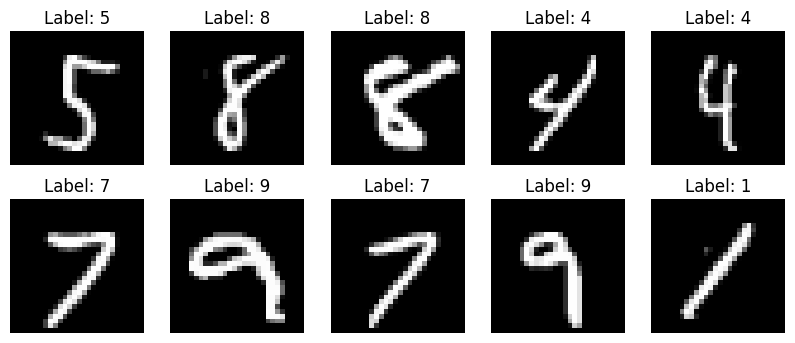

In [145]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape images for Keras input
x_train = np.array(x_train).reshape(-1, 28, 28, 1) # Shape (num_samples, 28, 28, 1)
x_test = np.array(x_test).reshape(-1, 28, 28, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i+3500].reshape(28, 28), cmap="gray")
  plt.title(f"Label: {np.argmax(y_train[i+3500])}")
  plt.axis("off")
plt.show()

In [146]:
num_classes = 10
input_shape = (28, 28, 1)
def build_functional_model():
# Input layer
  inputs = keras.Input(shape=input_shape)
# Flatten layer
  x = keras.layers.Flatten()(inputs)
# Hidden layers
  x = keras.layers.Dense(64, activation="sigmoid")(x)
  x = keras.layers.Dense(128, activation="sigmoid")(x)
  x = keras.layers.Dense(256, activation="sigmoid")(x)
# Output layer
  outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
# Create model
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model
# Build the model
functional_model = build_functional_model()
functional_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
functional_model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

In [148]:
batch_size = 128
epochs = 2000
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = functional_model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1068 - loss: 2.3163 - val_accuracy: 0.1063 - val_loss: 2.3048
Epoch 2/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1190 - loss: 2.3004 - val_accuracy: 0.1063 - val_loss: 2.2997
Epoch 3/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1175 - loss: 2.2989 - val_accuracy: 0.1074 - val_loss: 2.2979
Epoch 4/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1200 - loss: 2.2979 - val_accuracy: 0.1063 - val_loss: 2.2960
Epoch 5/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1205 - loss: 2.2961 - val_accuracy: 0.1028 - val_loss: 2.2950
Epoch 6/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1284 - loss: 2.2941 - val_accuracy: 0.1784 - val_loss: 2.2923
Epoch 7/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1388 - loss: 2.2922 - val_accuracy: 0.1101 - val_loss: 2.2906
Epoch 8/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1411 - loss: 2.2895 - 

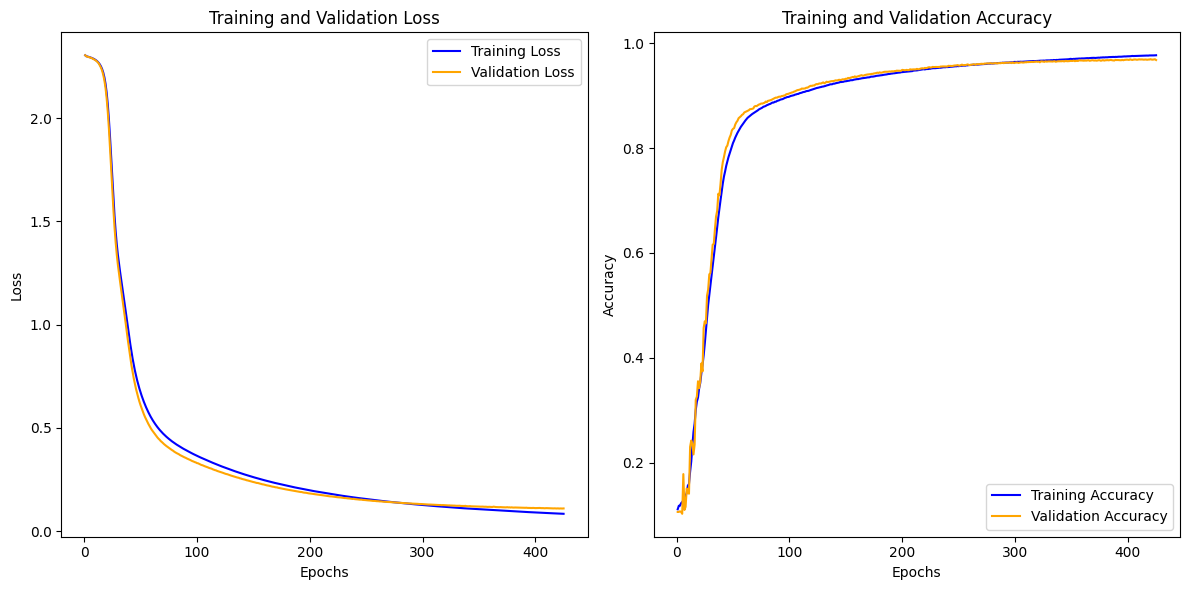

In [149]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [150]:
print(x_train[1])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [153]:
print(y_train[12000])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [154]:
# Predict on test data
predictions = functional_model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image: 7
True label for first image: 7


In [155]:
functional_model.save('mnist_model.h5')

In [157]:
loaded_model = tf.keras.models.load_model('mnist_model.h5')

## 2. Devnagari Digits Dataset

In [3]:

# Define dataset paths
train_dir = "/content/drive/MyDrive/Sem6/AI_ML/week_4/Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/Sem6/AI_ML/week_4/Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Test"
# Define image size
img_height, img_width = 28, 28
# Function to load images and labels using PIL
def load_images_from_folder(folder):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder)) # Sorted class names (digit_0, digit_1, ...)
  class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
      # Load image using PIL
      img = Image.open(img_path).convert("L") # Convert to grayscale
      img = img.resize((img_width, img_height)) # Resize to (28,28)
      img = np.array(img) / 255.0 # Normalize pixel values to [0,1]

      images.append(img)
      labels.append(label)
  return np.array(images), np.array(labels)
# Load training and testing datasets
train_x, train_y = load_images_from_folder(train_dir)
test_x, test_y = load_images_from_folder(test_dir)



Training set: (17020, 28, 28, 1), Labels: (17020, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


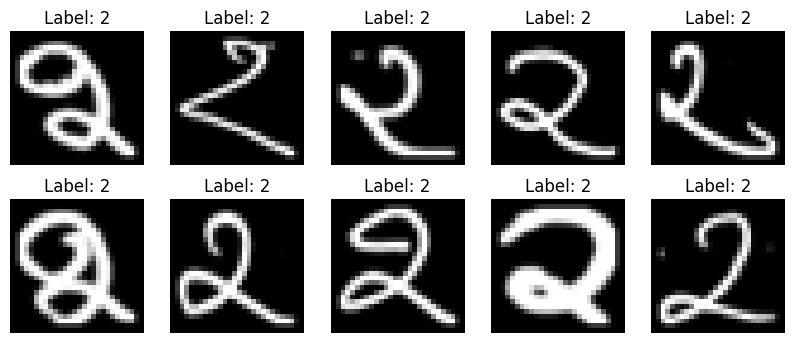

In [20]:
x_train, y_train = train_x, train_y
x_test, y_test = test_x, test_y


# Reshape images for Keras input
x_train = np.array(x_train).reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = np.array(x_test).reshape(-1, img_height, img_width, 1)

# x_train = x_train.astype("float32") / 255.0
# x_test = x_test.astype("float32") / 255.0
x_train = (x_train * 255).astype("uint8")
x_test = (x_test * 255).astype("uint8")

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i+3500].reshape(28, 28), cmap="gray")
  plt.title(f"Label: {np.argmax(y_train[i+3500])}")
  plt.axis("off")
plt.show()

In [21]:
print(x_train[1].shape)

(28, 28, 1)


In [22]:
print(x_train[1])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  2]
  [  9]
  [ 15]
  [ 12]
  [  5]
  [  2]
  [  2]
  [  2]
  [  2]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  1]
  [ 15]
  [ 47]
  [ 94]
  [122]
  [108]
  [ 67]
  [ 52]
  [ 52]
  [ 50]
  [ 46]
  [ 31]
  [ 15]
  [  8]
  [  2]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  6]
  [ 31]
  [ 92]
  [161]
  [208]
  [225]
  [215]
  [186]
  [174]
  [171]
  [166]
  [160]
  [134]
  [ 96]
  [ 66]
  [ 33]
  [  9]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  1]
  [ 17]
  [ 67]
  [144]
  [216]
  [249]
  [255]


In [25]:
print(y_test[1000])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


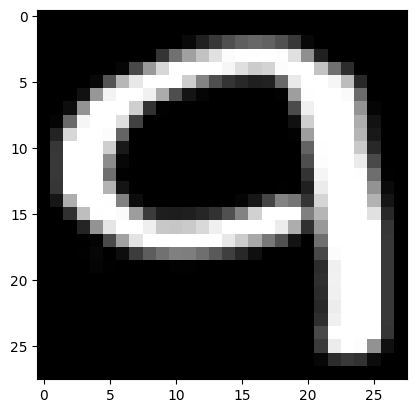

In [26]:
plt.imshow(x_train[1800].reshape(28, 28), cmap="gray")
plt.show()

In [27]:
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
])

In [28]:
model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
batch_size = 128
epochs = 1000
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience= 4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.2,
callbacks=callbacks,
)

Epoch 1/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1353 - loss: 2.1613 - val_accuracy: 0.0000e+00 - val_loss: 4.7714
Epoch 2/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1796 - loss: 2.0834 - val_accuracy: 0.0000e+00 - val_loss: 5.3667
Epoch 3/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2253 - loss: 2.0672 - val_accuracy: 0.0000e+00 - val_loss: 5.7385
Epoch 4/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3178 - loss: 2.0545 - val_accuracy: 0.0000e+00 - val_loss: 6.0082
Epoch 5/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3394 - loss: 2.0430 - val_accuracy: 8.8132e-04 - val_loss: 6.2197
Epoch 6/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3727 - loss: 2.0303 - val_accuracy: 5.8754e-04 - val_loss: 6.3958
Epoch 7/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4513 - loss: 2.0158 - val_accuracy: 0.0000e+00 - val_loss: 6.5449
Epoch 8/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accur

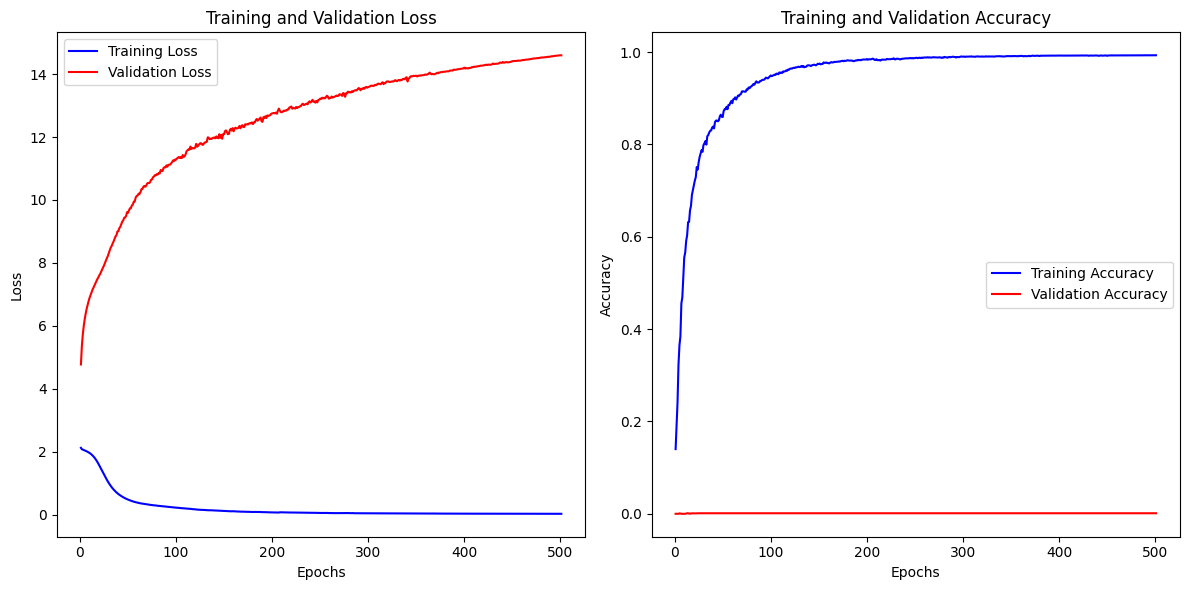

In [31]:
import matplotlib.pyplot as plt
# Assuming ’history’ is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Based on the graph obtained the model is performing well on the training data but on validation test the performance is very bad. Based on the graph the model seems to be overfitting and the reason for this can be flattening the images dataset. This have caused the loss of spatial information which did not make model to perform well on test data. Further improvements can be done by using CNN models for this dataset.

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 3ms/step - accuracy: 0.7640 - loss: 3.0540
Test accuracy: 0.7640


In [33]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted label for first image: 0
True label for first image: 0


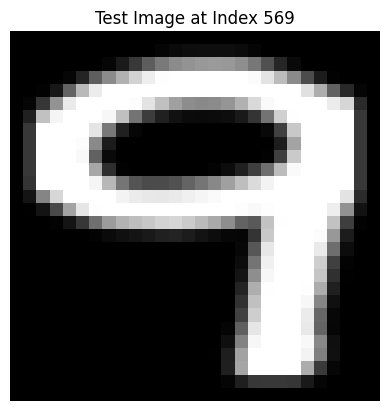

In [43]:

# Select a random image from x_test
index = np.random.randint(0, len(x_test))
sample_image = x_test[index]

# Reshape if needed (for single-image prediction)
sample_image = np.expand_dims(sample_image, axis=0)  # Ensure batch dimension

# Display the selected image
plt.imshow(x_test[index].squeeze(), cmap="gray")  # Use cmap="gray" for grayscale images
plt.title(f"Test Image at Index {index}")
plt.axis("off")
plt.show()

In [44]:
# Predict the class probabilities
predictions = model.predict(sample_image)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Print Prediction
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {predictions}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Class: [1]
Class Probabilities: [[2.9408489e-04 9.9858320e-01 1.8345975e-04 5.5638777e-10 7.3495357e-05
  4.4348522e-10 8.6550810e-04 8.7428553e-08 3.8924188e-08 2.3821624e-08]]


In [45]:
model.save('devnagari_digits_model.h5')

In [46]:
model = tf.keras.models.load_model('devnagari_digits_model.h5')